# Предобработка данных 
1) Разбиение на пакеты в зависимости от мета данных и сохранение данных пакетов.


From Authors

Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesion_id-column within the HAM10000_metadata file.

# Skin Lessions Types
7 types of skin lessions

1) Actinic keratoses and intraepithelial carcinoma  / Bowen's disease - akiec

2) basal cell carcinoma - bcc

3) benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses) - bkl

4) dermatofibroma - df

5) melanoma - mel

6) melanocytic nevi - nv 

7) vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage) - vasc


In [1]:
from keras import layers
from keras import models
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'



Using TensorFlow backend.


In [3]:
data = pd.read_csv('dataset/HAM10000_metadata.csv',delimiter = ',')
img_data = pd.read_csv('hmnist_8_8_RGB.csv',delimiter = ',')
data = data.dropna(axis = 0, subset = ['age'])
data = data.drop_duplicates(subset = ['lesion_id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 0 to 10010
Data columns (total 7 columns):
lesion_id       7418 non-null object
image_id        7418 non-null object
dx              7418 non-null object
dx_type         7418 non-null object
age             7418 non-null float64
sex             7418 non-null object
localization    7418 non-null object
dtypes: float64(1), object(6)
memory usage: 463.6+ KB


In [ ]:
data.head()

In [5]:
img_data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191,label
0,199,156,188,210,165,198,216,176,203,215,...,214,167,191,199,157,175,184,143,167,2
1,115,87,115,180,133,158,200,153,187,215,...,207,167,188,177,128,138,74,51,60,2
2,203,146,164,209,144,153,217,160,181,215,...,211,160,175,199,152,172,177,138,158,2
3,135,96,110,198,141,156,208,148,158,210,...,179,141,157,153,122,138,58,39,46,2
4,204,156,187,232,185,216,236,196,220,217,...,236,189,213,233,182,209,207,175,188,2


In [66]:
# data['dx'] = data['dx'].apply(lambda x: x.cat.codes)
data['dx'] = data['dx'].astype("category").cat.codes
data['dx_type'] = data['dx_type'].astype("category").cat.codes
data['sex'] = data['sex'].astype("category").cat.codes 
data['localization'] = data['localization'].astype("category").cat.codes 

In [67]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4
6,HAM_0002761,ISIC_0029176,2,3,60.0,1,5
8,HAM_0005132,ISIC_0025837,2,3,70.0,0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a37fc5668>,
      dtype=object)

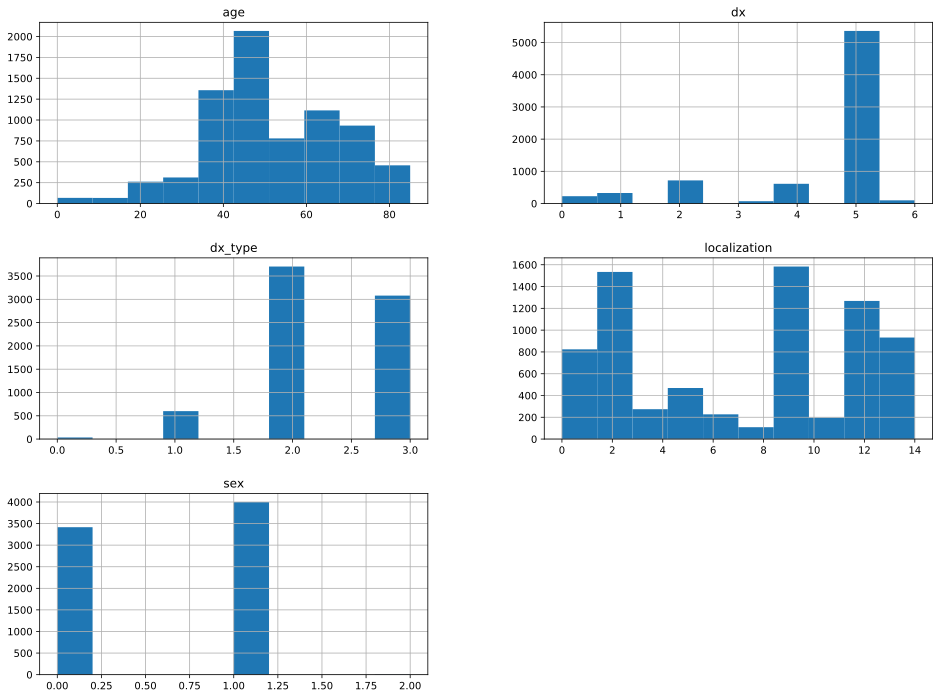

In [68]:
plt.rcParams['figure.figsize'] = (16,12)
data.hist()

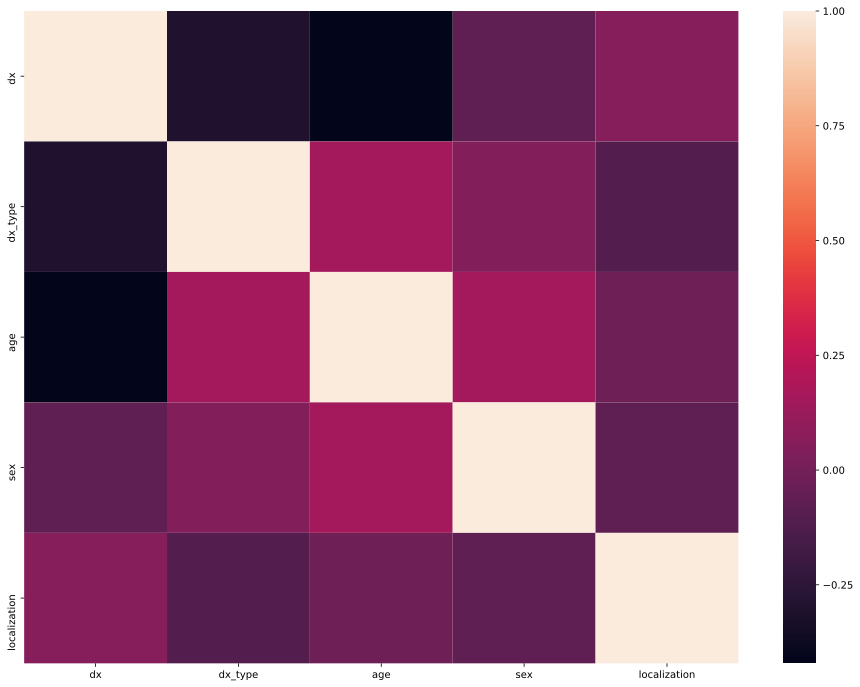

In [69]:
data.corr()
sns.heatmap(data.corr())

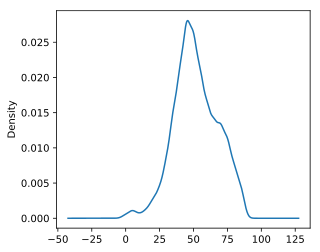

In [70]:
data['age'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));


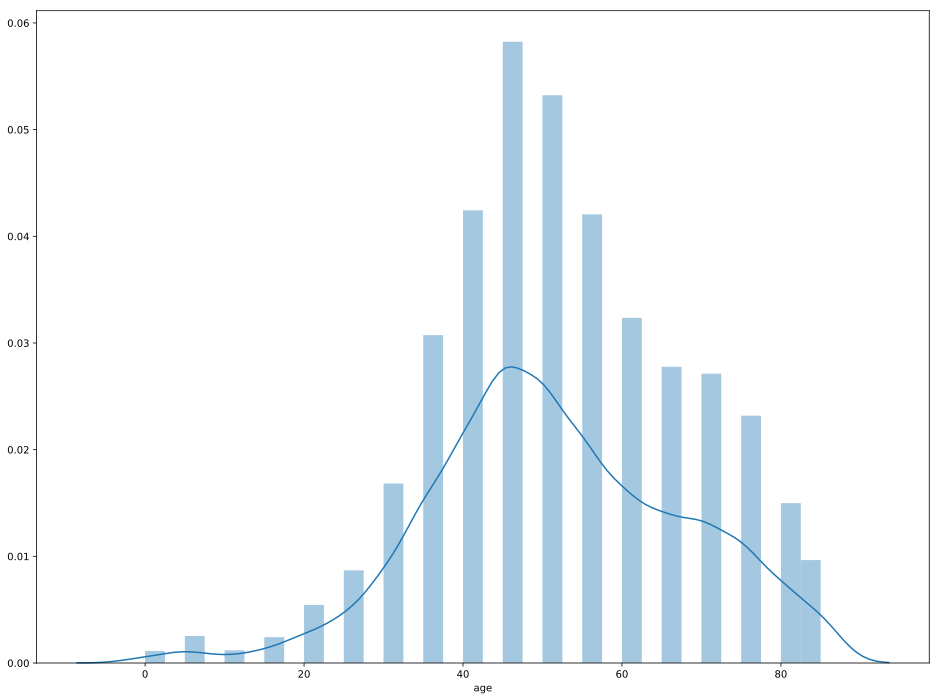

In [71]:
sns.distplot(data['age']);

# Violin plot 
To the right, there is a violin plot with the kernel density estimate on both sides.

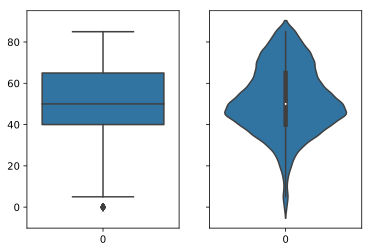

In [73]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data['age'], ax=axes[0]);
sns.violinplot(data=data['age'], ax=axes[1]);

In [ ]:
sns.jointplot(x='age', y='localization', 
              data=data, kind='scatter');

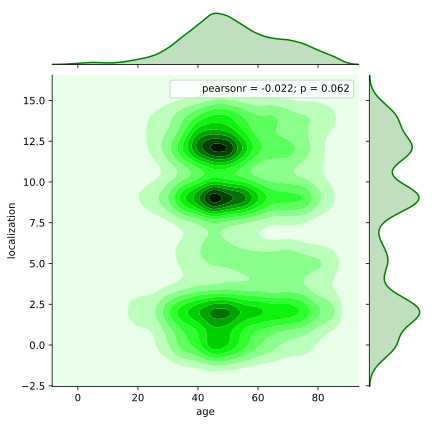

In [76]:
sns.jointplot(x='age', y='localization', data=data,
              kind="kde", color="g");


In [79]:
# # `pairplot()` may become very slow with the SVG format
# %config InlineBackend.figure_format = 'png'
# numerical = list(set(numerical) - 
#                  set(['age', 'localization',]))
# sns.pairplot(data[['age'],['localization']]);

NameError: name 'numerical' is not defined

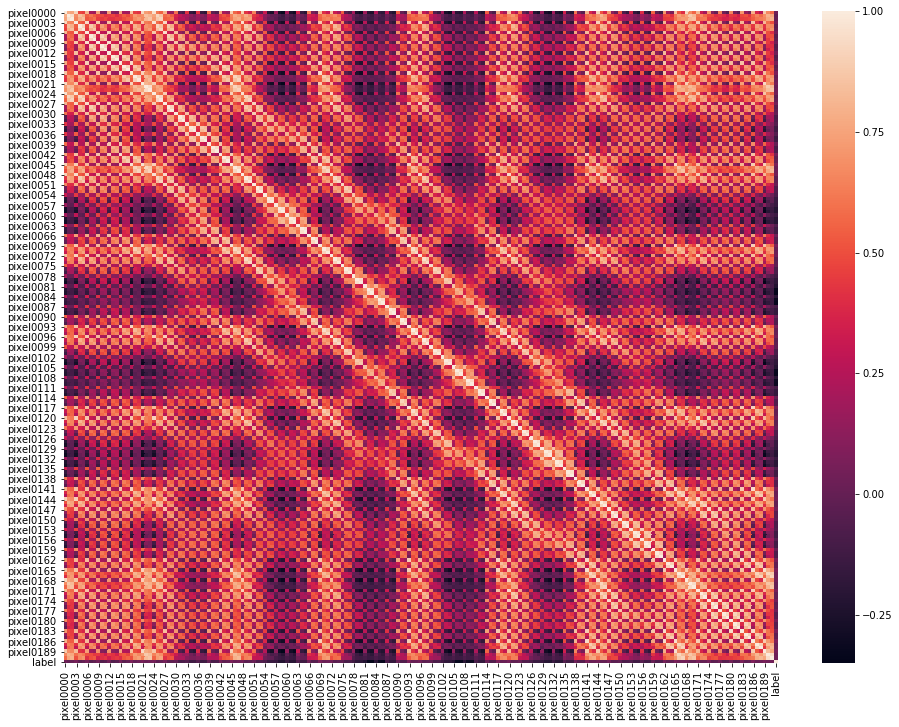

In [32]:
sns.heatmap(img_data.corr())

In [36]:
scaler = StandardScaler()
img_data_scaled = scaler.fit_transform(img_data)

In [37]:
tsne = TSNE(random_state = 17)
tsne_repr = tsne.fit_transform(img_data_scaled)

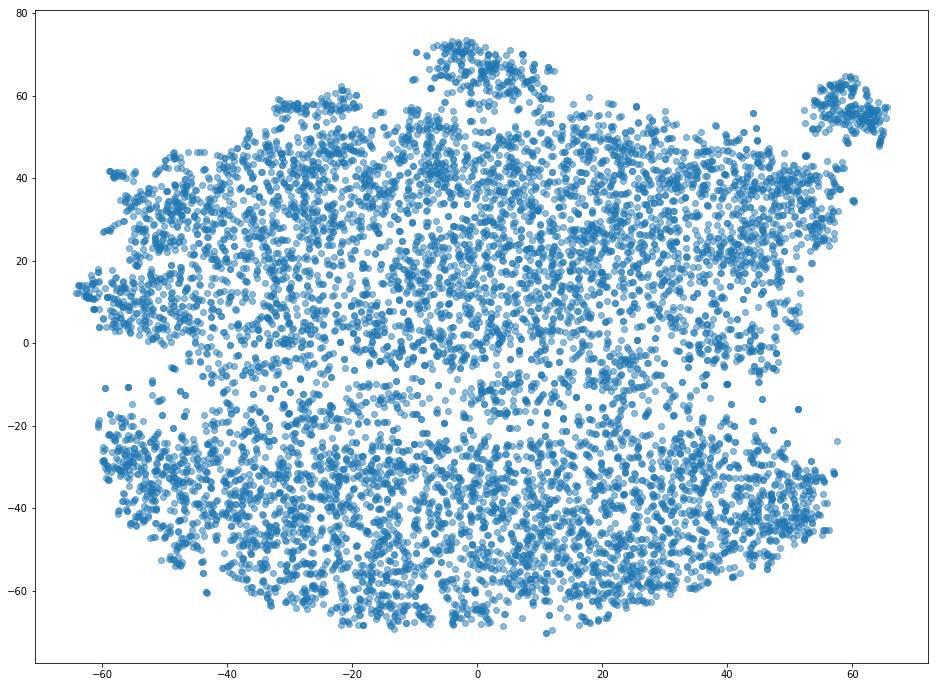

In [38]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1],alpha = .5)

In [39]:
data['age'].describe()

count    7418.000000
mean       51.658803
std        16.016472
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

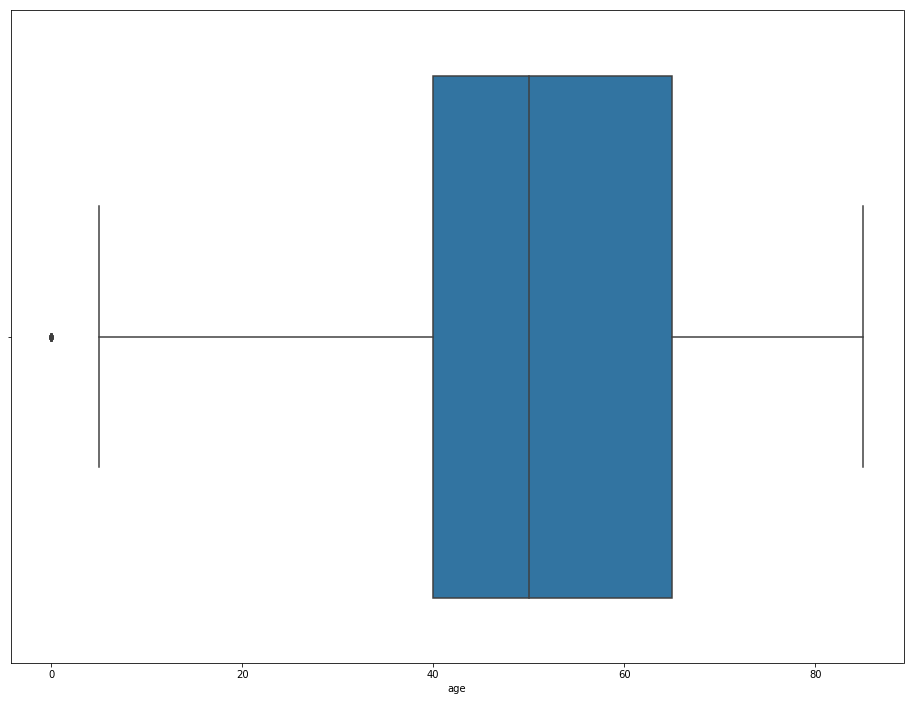

In [41]:
sns.boxplot(x = 'age', data = data);

# Categorial

In [43]:
data['dx'].nunique()

7

In [45]:
data['dx'].value_counts()

5    5361
2     718
4     613
1     327
0     228
6      98
3      73
Name: dx, dtype: int64

In [46]:
data['dx'].value_counts(normalize= True)

5    0.722702
2    0.096792
4    0.082637
1    0.044082
0    0.030736
6    0.013211
3    0.009841
Name: dx, dtype: float64

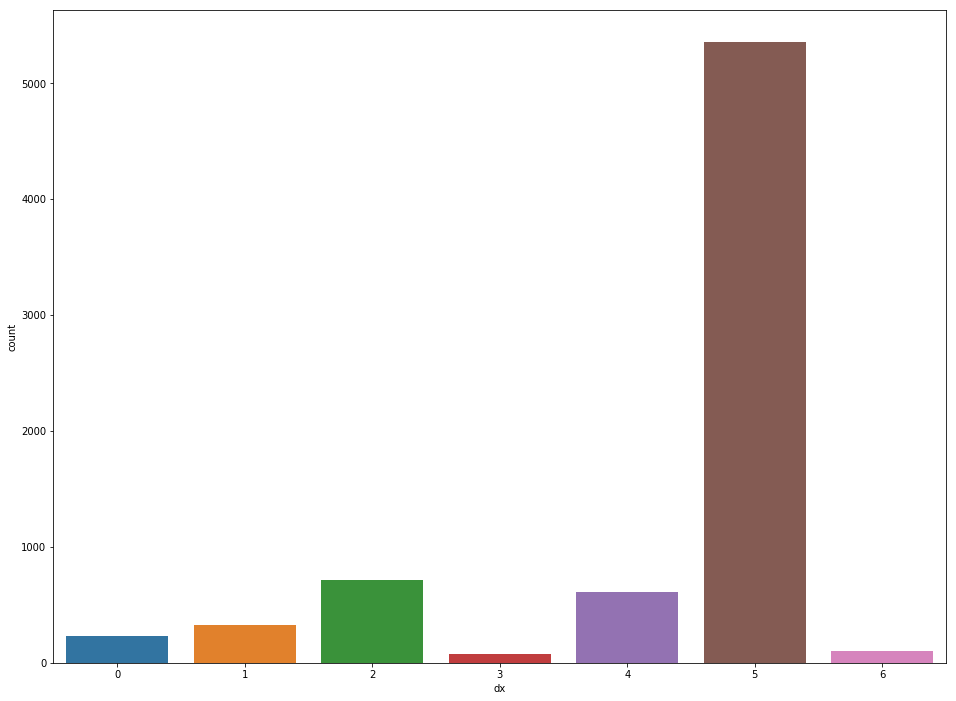

In [47]:
sns.countplot(x= 'dx',data = data)

# Feature Interaction
### categorical-categorical

In [48]:
pd.crosstab(data['dx'],data['localization'])

localization,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
dx,,,,,,,,,,,,,,,
0,3,0,22,9,2,84,0,0,8,41,8,8,1,0,42
1,9,0,123,32,0,61,2,0,1,36,11,11,6,3,32
2,36,0,133,50,4,194,1,1,12,109,20,24,57,10,67
3,2,0,1,0,0,0,1,1,0,54,0,0,0,0,14
4,31,0,185,34,10,64,15,0,1,104,18,9,25,6,111
5,718,3,1058,111,19,61,208,43,39,1224,60,24,1152,138,503
6,22,0,12,3,0,5,0,0,3,16,2,2,27,0,6


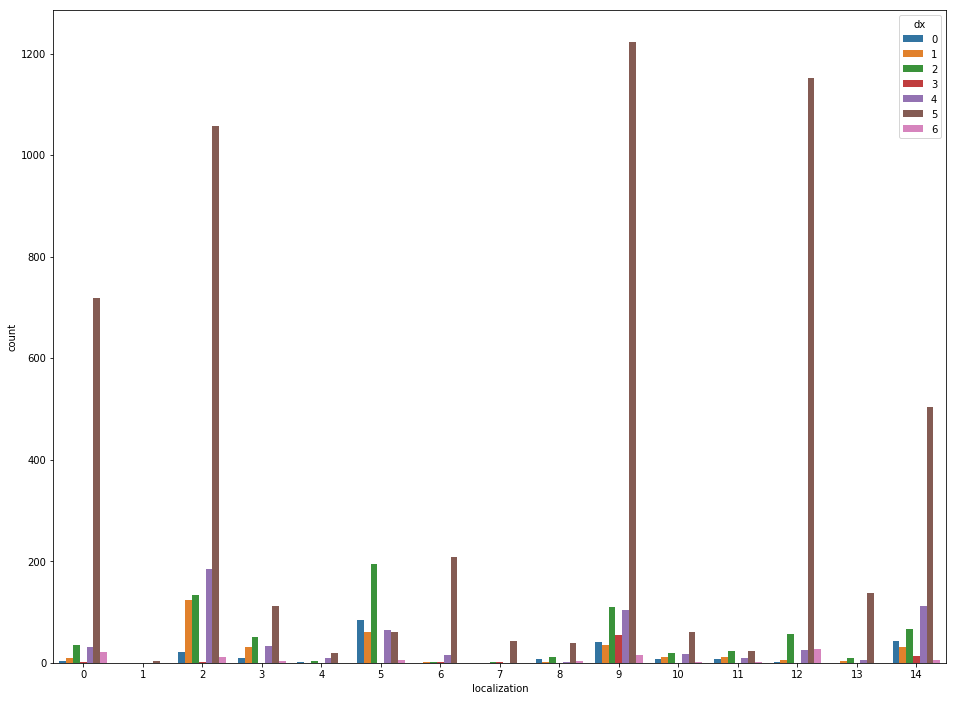

In [50]:
sns.countplot(x= 'localization', hue= 'dx', data= data)

# Categorical - number 


In [54]:
data.groupby('dx')['age',
                   'localization'].agg([np.median,
                                       np.std])

age            localization          
   median        std       median       std
dx                                         
0    67.5  11.576647            5  3.983756
1    70.0  13.518275            3  4.192754
2    65.0  13.981531            5  4.198884
3    55.0  13.229835            9  2.769081
4    65.0  15.105509            5  4.778987
5    45.0  14.169103            9  4.884286
6    55.0  20.373446            9  5.108089

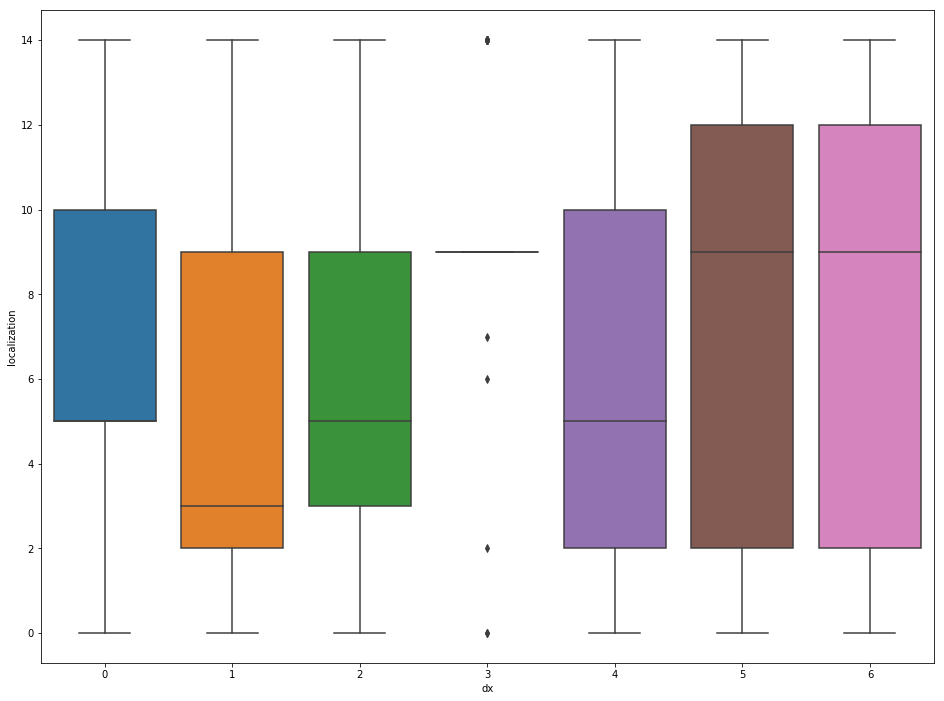

In [55]:
sns.boxplot(x='dx',y='localization',data = data)